# Project: Wrangling and Analyze Data

## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

WeRateDogs twitter archive data contains tweet texts from the WeRateDogs twitter page, the tweets contains 
information about the dog rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo). 
The data was filtered to only include tweets with ratings

In [1]:
import pandas as pd
import numpy as np
import json 
import requests
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_archive=pd.read_csv('twitter-archive-enhanced.csv')
df_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
import requests

r = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('image-predictions.tsv',mode='wb') as file:
    file.write(r.content)

In [4]:
r.status_code

200

In [4]:
r.headers['content-type']

'text/tab-separated-values; charset=utf-8'

In [5]:
df_pred=pd.read_csv('image-predictions.tsv',sep='\t')
df_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [595]:
import tweepy
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [596]:
print(api)

In [598]:
IDs=df_archive['tweet_id'].tolist()
IDs

[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256,
 891087950875897856,
 890971913173991426,
 890729181411237888,
 890609185150312448,
 890240255349198849,
 890006608113172480,
 889880896479866881,
 889665388333682689,
 889638837579907072,
 889531135344209921,
 889278841981685760,
 888917238123831296,
 888804989199671297,
 888554962724278272,
 888202515573088257,
 888078434458587136,
 887705289381826560,
 887517139158093824,
 887473957103951883,
 887343217045368832,
 887101392804085760,
 886983233522544640,
 886736880519319552,
 886680336477933568,
 886366144734445568,
 886267009285017600,
 886258384151887873,
 886054160059072513,
 885984800019947520,
 885528943205470208,
 885518971528720385,
 885311592912609280,
 885167619883638784,
 884925521741709313,
 884876753390489601,
 884562892145688576,
 884441805382717440,
 884247878851493888,
 884162670584377345,
 883838122936631299,
 883482846933004288,
 883360690899218434,
 883117836046

In [606]:
#get json data and save to list
json_list=[]
not_found_ids=0
for t_id in IDs:
    try:
        tweetStatus = api.get_status(t_id, tweet_mode='extended')
        json_list.append(tweetStatus._json)
    except tweepy.TweepyException as exception:
                not_found_ids+=1
                print(exception)
                print(not_found_ids)

404 Not Found
144 - No status found with that ID.
1
404 Not Found
144 - No status found with that ID.
2
404 Not Found
144 - No status found with that ID.
3
404 Not Found
144 - No status found with that ID.
4
404 Not Found
144 - No status found with that ID.
5
404 Not Found
144 - No status found with that ID.
6
404 Not Found
144 - No status found with that ID.
7
404 Not Found
144 - No status found with that ID.
8
404 Not Found
144 - No status found with that ID.
9
404 Not Found
144 - No status found with that ID.
10
404 Not Found
144 - No status found with that ID.
11
404 Not Found
144 - No status found with that ID.
12
404 Not Found
144 - No status found with that ID.
13
404 Not Found
144 - No status found with that ID.
14
404 Not Found
144 - No status found with that ID.
15
404 Not Found
144 - No status found with that ID.
16
404 Not Found
144 - No status found with that ID.
17
404 Not Found
144 - No status found with that ID.
18
404 Not Found
144 - No status found with that ID.
19
40

Rate limit reached. Sleeping for: 404


404 Not Found
144 - No status found with that ID.
28
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=60)
29
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=60)
30
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=60)
31
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=60)
32
Failed to send request: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))
33
Failed to send request: HTTPSConnectionPool(host='api.twitter.com', port=443): Read timed out. (read timeout=60)
34
404 Not Found
144 - No status found with that ID.
35


In [607]:
#save json data to text file with each IDs data in its own line
import json
with open('tweet_json.txt', 'w', encoding = 'utf-8') as text_file:  
     for json_tweet in json_list:
        json.dump(json_tweet, text_file)
        text_file.write('\n')

In [6]:
#load each line from text file to a list and convert list to a dataframe
tweets=[]
with open('tweet_json.txt', 'r') as text_file:
    for line in text_file:
        rows=json.loads(line)
        tweets.append(rows)

In [7]:
df_API=pd.DataFrame(tweets,columns={'id','retweet_count','favorite_count'})
df_API=df_API.rename(columns={'id':'tweet_id'})
df_API.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33767,6997
1,892177421306343426,29295,5297
2,891815181378084864,22030,3476
3,891689557279858688,36863,7211
4,891327558926688256,35250,7751


## Assessing Data
In this section I will detect and document **eight (8) quality issues and two (2) tidiness issue** making use of **both** visual assessment and programmatic assessement to assess the data.

In [21]:
df_API

,tweet_id,retweet_count,like_count
0,892420643555336193,7000,33783
1,892177421306343426,5298,29317
2,891815181378084864,3477,22042
3,891689557279858688,7221,36917
4,891327558926688256,7752,35299
...,...,...,...
2351,666049248165822465,37,89
2352,666044226329800704,115,247
2353,666033412701032449,36,100
2354,666029285002620928,39,112


In [22]:
df_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [23]:
df_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [25]:
df_API.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2356 non-null   int64
 1   retweet_count  2356 non-null   int64
 2   like_count     2356 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [77]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [27]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [454]:
df_archive[df_archive['rating_denominator']!=10].rating_denominator.value_counts()

50     3
11     3
80     2
20     2
120    1
16     1
110    1
130    1
40     1
0      1
90     1
15     1
170    1
150    1
7      1
70     1
2      1
Name: rating_denominator, dtype: int64

In [455]:
len(df_archive[df_archive['rating_denominator']!=10])

23

In [37]:
df_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [43]:
df_pred[df_pred['img_num']==3]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
479,675349384339542016,https://pbs.twimg.com/media/CV9SrABU4AQI46z.jpg,3,borzoi,0.866367,True,Saluki,0.122079,True,Irish_wolfhound,0.004020,True
602,679828447187857408,https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg,3,Chihuahua,0.346545,True,dalmatian,0.166246,True,toy_terrier,0.117502,True
609,680085611152338944,https://pbs.twimg.com/media/CXAiiHUWkAIN_28.jpg,3,pillow,0.778113,False,apron,0.095023,False,wallet,0.049326,False
627,680836378243002368,https://pbs.twimg.com/media/CXLREjOW8AElfk6.jpg,3,Pembroke,0.427781,True,Shetland_sheepdog,0.160669,True,Pomeranian,0.111250,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1899,851224888060895234,https://pbs.twimg.com/media/C9AohFoWsAUmxDs.jpg,3,car_mirror,0.971512,False,seat_belt,0.007063,False,standard_poodle,0.005683,True
1925,857393404942143489,https://pbs.twimg.com/media/C-YSwA_XgAEOr25.jpg,3,malamute,0.841597,True,Siberian_husky,0.073644,True,Eskimo_dog,0.072129,True
1988,872820683541237760,https://pbs.twimg.com/media/DBzhx0PWAAEhl0E.jpg,3,pug,0.999120,True,French_bulldog,0.000552,True,bull_mastiff,0.000073,True
2016,879862464715927552,https://pbs.twimg.com/media/DDXmPrbWAAEKMvy.jpg,3,basset,0.813507,True,beagle,0.146654,True,cocker_spaniel,0.009485,True


In [46]:
df_archive[df_archive['tweet_id']==888554962724278272]['expanded_urls']

18    https://twitter.com/dog_rates/status/888554962...
Name: expanded_urls, dtype: object

In [47]:
df_API.describe()

,tweet_id,retweet_count,like_count
count,2.356000e+03,2356.000000,2356.000000
mean,7.427738e+17,2494.650679,7154.369694
std,6.857009e+16,4190.529944,11025.232371
min,6.660209e+17,1.000000,0.000000
25%,6.783989e+17,501.750000,1244.500000
50%,7.196279e+17,1185.500000,3111.500000
75%,7.993373e+17,2877.500000,8860.000000
max,8.924206e+17,70668.000000,144788.000000


In [49]:
df_pred[df_pred.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [ ]:
df_archive[df_archive.tweet_id.duplicated()]

In [50]:
df_archive.rating_numerator.sort_values()

315        0
1016       0
2335       1
2261       1
2338       1
        ... 
2074     420
188      420
189      666
313      960
979     1776
Name: rating_numerator, Length: 2356, dtype: int64

In [52]:
df_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [53]:
df_archive.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

### Quality issues

1. Replies don't represent original ratings

2. Duplicates present in the form of retweets in archive dataframe

3. Timestamp from archive dataframe stored as string and not datetime 

4. Incorrect dog name 'a' in archive table

5. 23 records in the archive df with rating denominator not equal to 10

6. Several records with rating numerator greater than 15, 1776 clearly is an outlier

7. Non-descriptive column names p1,p2 and p3 in predictions dataframe

8. Dog image in twitter archive dataframe (expanded_urls) duplicated in image prediction data frame (jpg_url)


### Tidiness issues
1. Archive file: doggo, floofer, pupper and puppo all show the same information i.e. dog stage and should form one column

2. 'Source' from archive dataframe shows extra information that we don't need such as the http

## Cleaning Data
In this section I will clean **all** of the issues I documented while assessing. 

In [512]:
# Make copies of original pieces of data
df_arch_clean=df_archive.copy()
df_pred_clean=df_pred.copy()
df_API_clean=df_API.copy()

### Tidiness

### Issue #1: doggo, floofer, pupper and puppo  all show dog stage

#### Define: Create a feature called dog stage that collates information from the 4 dog stage columns

#### Code

In [513]:
import numpy as np
df_arch_clean['dog_stage']= np.select([df_arch_clean.doggo == 'doggo' ,
                                       df_arch_clean.puppo == 'puppo',
                                      df_arch_clean.floofer == 'floofer',
                                      df_arch_clean.pupper == 'pupper'],['doggo', 'puppo','floofer','pupper'], default='None')

#### Test

In [514]:
df_arch_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
146,863471782782697472,NaN,NaN,2017-05-13 19:11:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to Quinn. She's quite...,8.630625e+17,4.196984e+09,2017-05-12 16:05:02 +0000,"https://www.gofundme.com/helpquinny,https://tw...",13,10,Quinn,None,None,None,None,None
1889,674774481756377088,NaN,NaN,2015-12-10 02:15:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Superpup. His head isn't proportional ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674774481...,11,10,Superpup,None,None,pupper,None,pupper
2266,667530908589760512,NaN,NaN,2015-11-20 02:32:25 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Meet Naphaniel. He doesn't necessarily enjoy h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667530908...,10,10,Naphaniel,None,None,None,None,None
773,776249906839351296,NaN,NaN,2016-09-15 02:42:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. Pls stop sen...,7.007478e+17,4.196984e+09,2016-02-19 18:24:26 +0000,https://twitter.com/dog_rates/status/700747788...,11,10,very,None,None,None,None,None
1659,683098815881154561,NaN,NaN,2016-01-02 01:33:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",aahhhhkslaldhwnxmzbbs 12/10 for being da smoos...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/683098815...,12,10,None,None,None,None,None,None
785,775085132600442880,NaN,NaN,2016-09-11 21:34:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tucker. He would like a hug. 13/10 som...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/775085132...,13,10,Tucker,None,None,None,None,None
1272,709225125749587968,NaN,NaN,2016-03-14 03:50:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Walker. He's a Butternut Khalifa. Appe...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/709225125...,11,10,Walker,None,None,None,None,None
1232,713175907180089344,NaN,NaN,2016-03-25 01:29:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Opie and Clarkus. Clarkus fell as...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713175907...,10,10,Opie,None,None,None,None,None
1481,693280720173801472,NaN,NaN,2016-01-30 03:52:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sadie and her 2 pups Shebang &amp; Ruf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693280720...,10,10,Sadie,None,None,None,None,None
289,838201503651401729,NaN,NaN,2017-03-05 01:36:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Sunny. He can take down a ...,8.207497e+17,4.196984e+09,2017-01-15 21:49:15 +0000,https://twitter.com/dog_rates/status/820749716...,13,10,Sunny,None,None,None,None,None


In [515]:
df_arch_clean.dog_stage.value_counts()

None       1976
pupper      245
doggo        97
puppo        29
floofer       9
Name: dog_stage, dtype: int64

In [516]:
#drop puppo,pupper,doggo,floofer from dataframe
df_arch_clean=df_arch_clean.drop(['pupper','doggo','puppo','floofer'], axis=1)
df_arch_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


### Issue #2: 'source' column from archive dataframe shows extra information that we don't need such as the http

#### Define: extract source from string

#### Code

In [517]:
df_arch_clean['source'] = df_arch_clean['source'].str.extract(r'>([\s\S]*)$')
df_arch_clean['source']=df_arch_clean['source'].str[:-4]
df_arch_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


#### Test

In [518]:
df_arch_clean.source.value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

### Data Quality

### Issue #1:Replies don't represent original ratings

#### Define: use in_reply_to_status_id to remove replies from archive data frame

#### Code

In [519]:
df_arch_clean=df_arch_clean[df_arch_clean['in_reply_to_status_id'].isnull()]

#### Test

In [520]:
df_arch_clean['in_reply_to_status_id'].unique()

array([nan])

In [521]:
#drop in_reply_to_status_id and in_reply_to_user_id
df_arch_clean=df_arch_clean.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1)
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2278 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2278 non-null   int64  
 1   timestamp                   2278 non-null   object 
 2   source                      2278 non-null   object 
 3   text                        2278 non-null   object 
 4   retweeted_status_id         181 non-null    float64
 5   retweeted_status_user_id    181 non-null    float64
 6   retweeted_status_timestamp  181 non-null    object 
 7   expanded_urls               2274 non-null   object 
 8   rating_numerator            2278 non-null   int64  
 9   rating_denominator          2278 non-null   int64  
 10  name                        2278 non-null   object 
 11  dog_stage                   2278 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 231.4+ KB


### Issue #2: Duplicates in the form of retweets in archive dataframe

#### Define: use retweeted_status_id to remove retweets from dataframe

#### Code

In [522]:
df_arch_clean=df_arch_clean[df_arch_clean['retweeted_status_id'].isnull()]

#### Test

In [523]:
df_arch_clean['retweeted_status_id'].unique()

array([nan])

In [524]:
#drop retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp
df_arch_clean=df_arch_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   expanded_urls       2094 non-null   object
 5   rating_numerator    2097 non-null   int64 
 6   rating_denominator  2097 non-null   int64 
 7   name                2097 non-null   object
 8   dog_stage           2097 non-null   object
dtypes: int64(3), object(6)
memory usage: 163.8+ KB


### Issue #3: Timestamp from archive dataframe stored as string and not datetime 

#### Define: Convert timestamp to datetime

#### Code

In [525]:
df_arch_clean['timestamp']=pd.to_datetime(df_arch_clean.timestamp)

#### Test

In [526]:
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   name                2097 non-null   object             
 8   dog_stage           2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 163.8+ KB


In [527]:
df_arch_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


### Issue #4: Incorrect dog name 'a' in archive table

#### Define: use string slicing and regex to get name from tweet text. For most of these records the dog name is presented in the following format: this is a (breed) named (dog name)

#### Code

In [528]:
df_arch_clean[['start', 'end']] = df_arch_clean['text'].str.split('named', n=1, expand=True)
df_arch_clean['new_name']=df_arch_clean.end.str.extract(r'([\w]+)')
df_arch_clean['right_name'] = np.where(df_arch_clean['name'] == 'a',
                                       df_arch_clean.loc[df_arch_clean.index]['new_name'],
                                       df_arch_clean.loc[df_arch_clean.index]['name'])

#### Test

In [529]:
df_arch_clean[df_arch_clean['name']=='a']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,start,end,new_name,right_name
56,881536004380872706,2017-07-02 15:32:16+00:00,Twitter for iPhone,Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14,10,a,pupper,Here is a pupper approaching maximum borkdrive...,None,NaN,NaN
649,792913359805018113,2016-10-31 02:17:31+00:00,Twitter for iPhone,Here is a perfect example of someone who has t...,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,Here is a perfect example of someone who has t...,None,NaN,NaN
801,772581559778025472,2016-09-04 23:46:12+00:00,Twitter for iPhone,Guys this is getting so out of hand. We only r...,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,Guys this is getting so out of hand. We only r...,None,NaN,NaN
1002,747885874273214464,2016-06-28 20:14:22+00:00,Twitter for iPhone,This is a mighty rare blue-tailed hammer sherk...,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,This is a mighty rare blue-tailed hammer sherk...,None,NaN,NaN
1004,747816857231626240,2016-06-28 15:40:07+00:00,Twitter for iPhone,Viewer discretion is advised. This is a terrib...,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,Viewer discretion is advised. This is a terrib...,None,NaN,NaN
1017,746872823977771008,2016-06-26 01:08:52+00:00,Twitter for iPhone,This is a carrot. We only rate dogs. Please on...,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,This is a carrot. We only rate dogs. Please on...,None,NaN,NaN
1049,743222593470234624,2016-06-15 23:24:09+00:00,Twitter for iPhone,This is a very rare Great Alaskan Bush Pupper....,https://twitter.com/dog_rates/status/743222593...,12,10,a,pupper,This is a very rare Great Alaskan Bush Pupper....,None,NaN,NaN
1193,717537687239008257,2016-04-06 02:21:30+00:00,Twitter for iPhone,People please. This is a Deadly Mediterranean ...,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,People please. This is a Deadly Mediterranean ...,None,NaN,NaN
1207,715733265223708672,2016-04-01 02:51:22+00:00,Twitter for iPhone,This is a taco. We only rate dogs. Please only...,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,This is a taco. We only rate dogs. Please only...,None,NaN,NaN
1340,704859558691414016,2016-03-02 02:43:09+00:00,Twitter for iPhone,Here is a heartbreaking scene of an incredible...,https://twitter.com/dog_rates/status/704859558...,10,10,a,pupper,Here is a heartbreaking scene of an incredible...,None,NaN,NaN


In [530]:
df_arch_clean=df_arch_clean.drop(['start','end','new_name','name'],axis=1)

In [531]:
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   expanded_urls       2094 non-null   object             
 5   rating_numerator    2097 non-null   int64              
 6   rating_denominator  2097 non-null   int64              
 7   dog_stage           2097 non-null   object             
 8   right_name          2061 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 228.4+ KB


In [550]:
df_arch_clean.rename(columns={'right_name':'dog_name'},inplace=True)

In [551]:
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2075 non-null   int64              
 1   timestamp           2075 non-null   datetime64[ns, UTC]
 2   source              2075 non-null   object             
 3   text                2075 non-null   object             
 4   expanded_urls       2072 non-null   object             
 5   rating_numerator    2075 non-null   int64              
 6   rating_denominator  2075 non-null   int64              
 7   dog_stage           2075 non-null   object             
 8   dog_name            2040 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 162.1+ KB


### Issue #5: records in the archive df with rating denominator not equal to 10

#### Define: remove records with rating denominator != 10 

In [533]:
df_arch_clean=df_arch_clean[df_arch_clean['rating_denominator']==10]

#### Test

In [534]:
df_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2080 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2080 non-null   int64              
 1   timestamp           2080 non-null   datetime64[ns, UTC]
 2   source              2080 non-null   object             
 3   text                2080 non-null   object             
 4   expanded_urls       2077 non-null   object             
 5   rating_numerator    2080 non-null   int64              
 6   rating_denominator  2080 non-null   int64              
 7   dog_stage           2080 non-null   object             
 8   right_name          2045 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(5)
memory usage: 162.5+ KB


### Issue #6: Several records with rating numerator greater than 15, 1776 clearly is an outlier

#### Define: Remove recods with rating numerator greater than 15

#### Code

In [535]:
df_arch_clean=df_arch_clean[df_arch_clean['rating_numerator']<=15]

#### Test

In [536]:
df_arch_clean['rating_numerator'].value_counts()

12    486
10    436
11    413
13    287
9     152
8      98
7      51
14     38
5      34
6      32
3      19
4      15
2       9
1       4
0       1
Name: rating_numerator, dtype: int64

In [537]:
df_arch_clean.shape

(2075, 9)

### Issue #7: Non-descriptive column names p1, p2 and p3 in predictions dataframe

#### Define: rename columns p1-p3 to prediction_1 t-prediction_3

#### Code

In [538]:
df_pred_clean.rename(columns={'p1':'prediction_1','p2':'prediction_2','p3':'prediction_3',
                             'p1_conf':'prediction_1_conf','p2_conf':'prediction_2_conf','p3_conf':'prediction_3_conf',
                             'p1_dog':'prediction_1_dog','p2_dog':'prediction_2_dog','p3_dog':'prediction_3_dog'},inplace=True)

#### Test

In [539]:
df_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           2075 non-null   int64  
 1   jpg_url            2075 non-null   object 
 2   img_num            2075 non-null   int64  
 3   prediction_1       2075 non-null   object 
 4   prediction_1_conf  2075 non-null   float64
 5   prediction_1_dog   2075 non-null   bool   
 6   prediction_2       2075 non-null   object 
 7   prediction_2_conf  2075 non-null   float64
 8   prediction_2_dog   2075 non-null   bool   
 9   prediction_3       2075 non-null   object 
 10  prediction_3_conf  2075 non-null   float64
 11  prediction_3_dog   2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Issue #8: Dog image in twitter archive dataframe (expanded_urls) duplicated in image prediction data frame (jpg_url)

#### Define: drop jpg_url in prediction dataframe

#### Code

In [540]:
df_pred_clean=df_pred_clean.drop('jpg_url',axis=1)

#### Test

In [541]:
df_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   tweet_id           2075 non-null   int64  
 1   img_num            2075 non-null   int64  
 2   prediction_1       2075 non-null   object 
 3   prediction_1_conf  2075 non-null   float64
 4   prediction_1_dog   2075 non-null   bool   
 5   prediction_2       2075 non-null   object 
 6   prediction_2_conf  2075 non-null   float64
 7   prediction_2_dog   2075 non-null   bool   
 8   prediction_3       2075 non-null   object 
 9   prediction_3_conf  2075 non-null   float64
 10  prediction_3_dog   2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(3)
memory usage: 135.9+ KB


## Storing Data
Saving gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [552]:
df_master=pd.merge(df_arch_clean,df_pred_clean, on=['tweet_id'],how='left')
df_master=pd.merge(df_master,df_API_clean,on=['tweet_id'],how='left')
df_master.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_stage,dog_name,img_num,...,prediction_1_conf,prediction_1_dog,prediction_2,prediction_2_conf,prediction_2_dog,prediction_3,prediction_3_conf,prediction_3_dog,retweet_count,like_count
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,None,Phineas,1.0,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,7000.0,33783.0
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,None,Tilly,1.0,...,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True,5298.0,29317.0
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,None,Archie,1.0,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,3477.0,22042.0
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,None,Darla,1.0,...,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,7221.0,36917.0
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,None,Franklin,2.0,...,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,7752.0,35299.0


In [554]:
df_master.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section I will analyze and visualize my wrangled data, producing at least **three (3) insights and one (1) visualization.**

In [555]:
#dog stage frequency count
df_master.dog_stage.value_counts()

None       1764
pupper      222
doggo        85
puppo        24
floofer       9
Name: dog_stage, dtype: int64

In [567]:
#get most popular dog name
df_master[df_master['dog_name']!='None'].dog_name.describe()

count        1469
unique        965
top       Charlie
freq           11
Name: dog_name, dtype: object

In [568]:
#retweet_count summary
df_master.retweet_count.describe()

count     2093.000000
mean      2319.187291
std       4040.377066
min         11.000000
25%        514.000000
50%       1126.000000
75%       2636.000000
max      70668.000000
Name: retweet_count, dtype: float64

In [573]:
df_master[df_master['retweet_count']==70668.000000]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_stage,dog_name,img_num,...,prediction_1_conf,prediction_1_dog,prediction_2,prediction_2_conf,prediction_2_dog,prediction_3,prediction_3_conf,prediction_3_dog,retweet_count,like_count
844,744234799360020481,2016-06-18 18:26:18+00:00,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,doggo,None,1.0,...,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True,70668.0,144788.0


In [571]:
#average like count grouped by do stage
df_master.groupby(['dog_stage']).like_count.mean()

dog_stage
None        7530.777651
doggo      15955.035714
floofer     9396.111111
pupper      6269.666667
puppo      19979.166667
Name: like_count, dtype: float64

### Insights:
1. Tweets with images of 'puppos' receive the highest number of likes on average

2. The highest number of retweets is from a video of a dog standing in a pool with a rating of 13/10

3. Charlie is the most popular dog name

4. Most of the dogs featured on the page are of dogs in the ‘pupper’ stage

### Visualization

Text(0.5, 0, 'Dog stage')

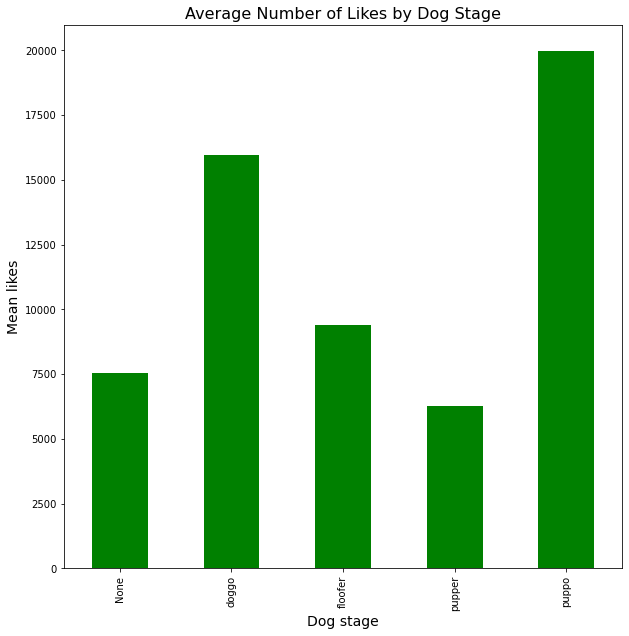

In [616]:
df_master.groupby(['dog_stage']).like_count.mean().plot(kind='bar',figsize=(10,10), color='green')
plt.title('Average Number of Likes by Dog Stage',fontsize=16)
plt.ylabel('Mean likes',fontsize=14)
plt.xlabel('Dog stage',fontsize=14)